In [41]:
from google.colab import drive  
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **LOAD THE DATASET**

In [44]:
data=pd.read_csv("/abalone (1).csv")


In [45]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# **ADD AGE COLUMN USING RINGS DATA**

In [46]:
Age=1.5+data.Rings


In [47]:
data["Age"]=Age

In [48]:
data=data.rename(columns = {'Whole weight':'Whole_weight','Shucked weight': 'Shucked_weight','Viscera weight': 'Viscera_weight',
                            'Shell weight': 'Shell_weight'})

In [49]:
data=data.drop(columns=["Rings"],axis=1)

In [50]:
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


# **UNIVARIATE**

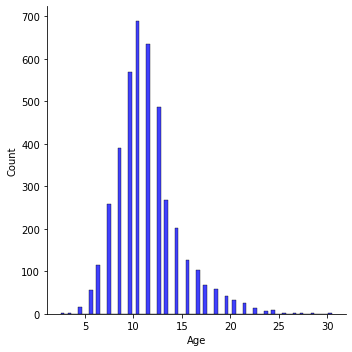

In [51]:
sns.displot(data["Age"], color='blue')

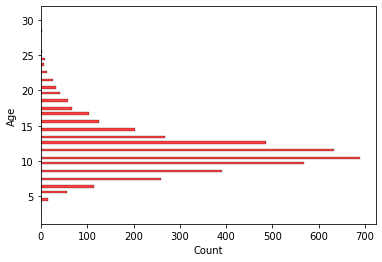

In [52]:
sns.histplot(y=data.Age,color='red')

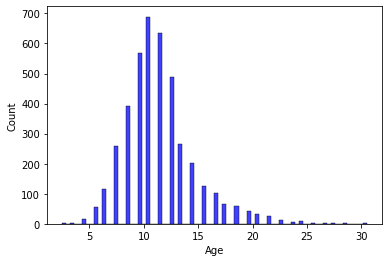

In [53]:
sns.histplot(x=data.Age,color='blue')

# **BOXPLOT**

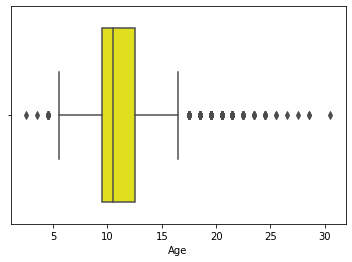

In [54]:
sns.boxplot(x=data.Age,color='yellow')

# **COUNTPLOT**

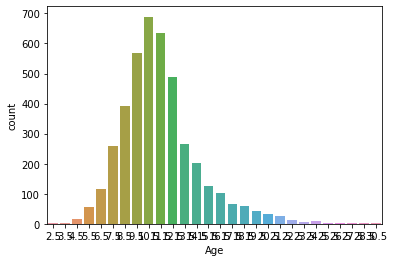

In [55]:
sns.countplot(x=data.Age)

# **Bi-Variate Analysis**

## **Barplot**

In [ ]:
sns.barplot(x=data.Whole_weight,y=data.Age)

# **Linearplot**

In [ ]:
sns.lineplot(x=data.Diameter,y=data.Length, color='Grey')

# **Scatterplot**

In [ ]:
sns.scatterplot(x=data.Whole_weight,y=data.Height,color='orange')

# **Pointplot**

In [ ]:
sns.pointplot(x=data.Age, y=data.Height, color="pink")

# **Regplot**

In [ ]:
sns.regplot(x=data.Age,y=data.Height,color='red')

# **Multi-Variate Analysis**

# **Pairplot**

In [ ]:
sns.pairplot(data=data[["Length","Diameter","Height","Whole_weight","Shucked_weight","Viscera_weight","Shell_weight","Age",]])

In [ ]:
sns.pairplot(data=data[["Height","Length","Diameter","Age","Whole_weight","Shucked_weight","Viscera_weight","Shell_weight"]],kind="kde")

# **Perform descriptive statistics on the dataset.**

In [ ]:
data.describe(include='all')

# **Check for Missing values and deal with them**.

In [ ]:
data.isnull().sum()

# **Find the outliers and replace the outliers**

In [ ]:
outliers=data.quantile(q=(0.25,0.75))
outliers

In [ ]:
a = data.Age.quantile(0.25)
b = data.Age.quantile(0.75)
c = b - a
lower_limit = a - 1.5 * c
data.median(numeric_only=True)

In [ ]:
data['Age'] = np.where(data['Age'] < lower_limit, 7, data['Age'])
sns.boxplot(x=data.Age,showfliers = False)

# **Check for Categorical columns and perform encoding.**

In [ ]:
data.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()
data.Sex = lab.fit_transform(data.Sex)

data.head()

# **Split the data into dependent and independent variables.**

In [ ]:
y = data["Sex"]
y.head()

In [ ]:
x=data.drop(columns=["Sex"],axis=1)
x.head()

# **Scale the independent variables**

In [ ]:
from sklearn.preprocessing import scale
X_Scaled = pd.DataFrame(scale(x), columns=x.columns)
X_Scaled.head()

# **Split the data into training and testing**

In [ ]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Scaled, y, test_size=0.2, random_state=0)

In [ ]:
X_Train.shape,X_Test.shape

In [ ]:
Y_Train.shape,Y_Test.shape

In [ ]:
X_Train.head()

In [ ]:
X_Test.head()

In [ ]:
Y_Train.head()

In [ ]:
Y_Test.head()

# **Build the Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [ ]:
model.fit(X_Train,Y_Train)

In [ ]:
y_predict = model.predict(X_Test)

In [ ]:
y_predict_train = model.predict(X_Train)

# **Train the Model**

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
print('Training accuracy: ',accuracy_score(Y_Train,y_predict_train))

# **Test the Model**

In [ ]:
print('Testing accuracy: ',accuracy_score(Y_Test,y_predict))

# **Measure the performance using Metrics**

In [ ]:
pd.crosstab(Y_Test,y_predict)

In [ ]:
print(classification_report(Y_Test,y_predict))